#Load the newsgroups file

In [2]:
import pickle
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

#Clean the corpus and apply LDA & NMF to identify 10 topics using each method

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(newsgroup_data)
number_topics = 10
lda = LatentDirichletAllocation(n_components=number_topics, random_state=0, n_jobs=1)
lda.fit(count_data)

LatentDirichletAllocation(n_jobs=1, random_state=0)

In [14]:
#Visualization
number_words = 10
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print("  " + ", ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, count_vectorizer, number_words)


Topic #0:
  ground, just, think, like, dont, im, does, pick, current, vs

Topic #1:
  god, people, time, does, dont, think, new, like, just, know

Topic #2:
  25, game, team, year, games, think, dont, good, like, season

Topic #3:
  like, dont, know, use, does, just, data, car, card, soon

Topic #4:
  kings, la, went, flames, just, new, dont, cal, 00, software

Topic #5:
  people, think, data, know, dont, just, time, way, does, im

Topic #6:
  car, good, like, just, dont, time, cancer, year, cars, know

Topic #7:
  drive, disk, drives, hard, controller, card, use, thanks, just, like

Topic #8:
  550, chi, bos, det, pit, tor, van, nyi, 12, nyr

Topic #9:
  like, know, does, im, need, dont, just, simms, thanks, new


#Plot the 10 most important words of these topics and a wordcloud of significant words from these topics

## Extract top words
**Explaination**:
Access the topic-word distributions from the fitted LDA model, get the list of words from the CountVectorizer, and for each topic, get the top number_words and store them.



In [19]:
topic_word_distributions = lda.components_
words = count_vectorizer.get_feature_names_out()
top_words_per_topic = []
for topic_idx, topic in enumerate(topic_word_distributions):
    top_word_indices = topic.argsort()[:-number_words - 1:-1]
    top_words = [words[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

print(top_words_per_topic)

[['ground', 'just', 'think', 'like', 'dont', 'im', 'does', 'pick', 'current', 'vs'], ['god', 'people', 'time', 'does', 'dont', 'think', 'new', 'like', 'just', 'know'], ['25', 'game', 'team', 'year', 'games', 'think', 'dont', 'good', 'like', 'season'], ['like', 'dont', 'know', 'use', 'does', 'just', 'data', 'car', 'card', 'soon'], ['kings', 'la', 'went', 'flames', 'just', 'new', 'dont', 'cal', '00', 'software'], ['people', 'think', 'data', 'know', 'dont', 'just', 'time', 'way', 'does', 'im'], ['car', 'good', 'like', 'just', 'dont', 'time', 'cancer', 'year', 'cars', 'know'], ['drive', 'disk', 'drives', 'hard', 'controller', 'card', 'use', 'thanks', 'just', 'like'], ['550', 'chi', 'bos', 'det', 'pit', 'tor', 'van', 'nyi', '12', 'nyr'], ['like', 'know', 'does', 'im', 'need', 'dont', 'just', 'simms', 'thanks', 'new']]


## Generate word clouds



In [17]:
wordclouds = []
for topic_words in top_words_per_topic:
    topic_string = " ".join(topic_words)
    wordcloud = WordCloud(random_state=42).generate(topic_string)
    wordclouds.append(wordcloud)

print(f"Generated {len(wordclouds)} word clouds.")

Generated 10 word clouds.


## Visualize word clouds


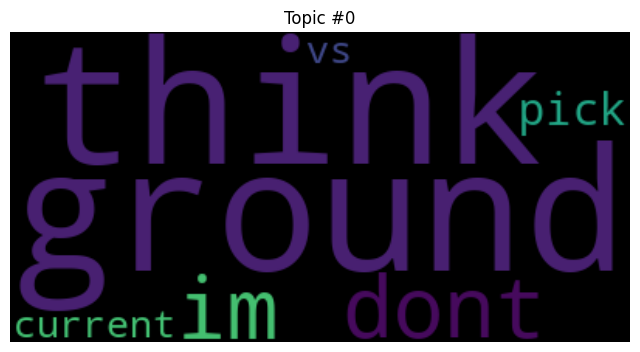

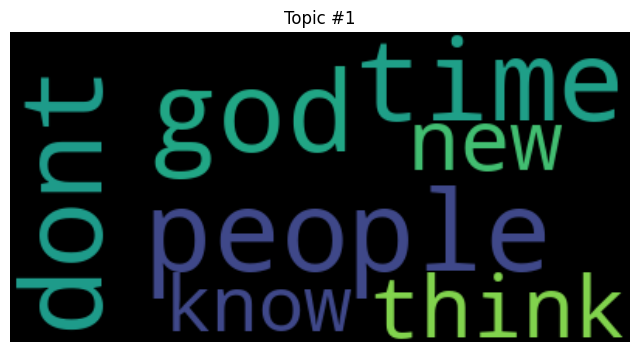

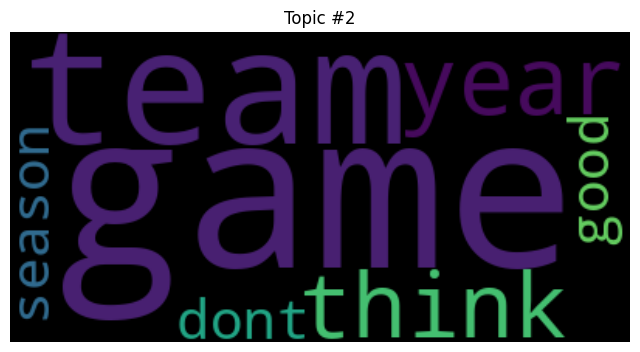

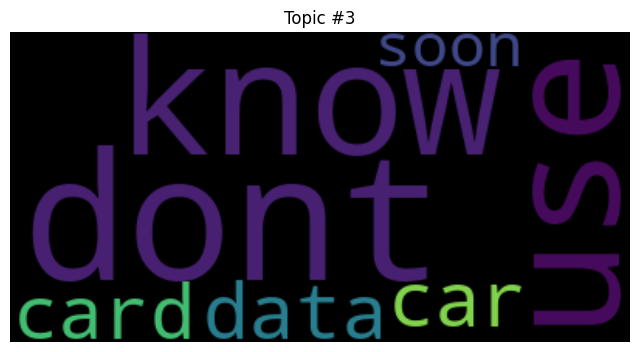

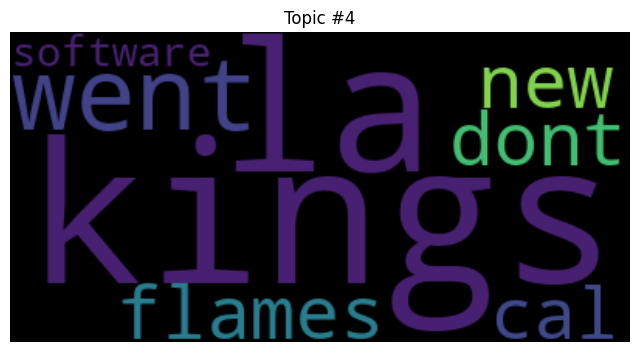

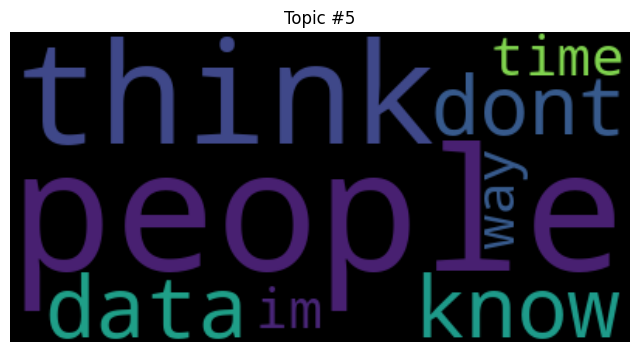

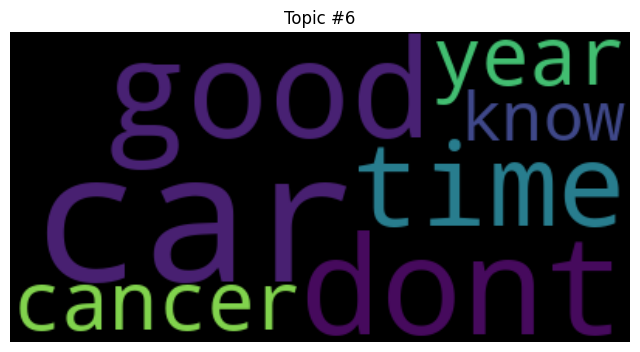

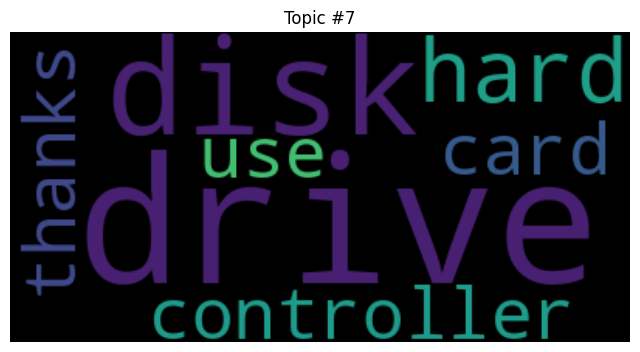

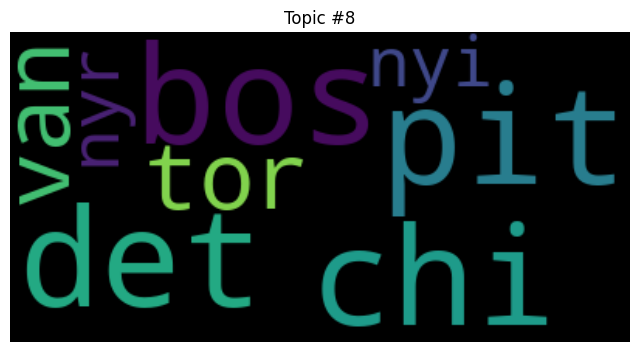

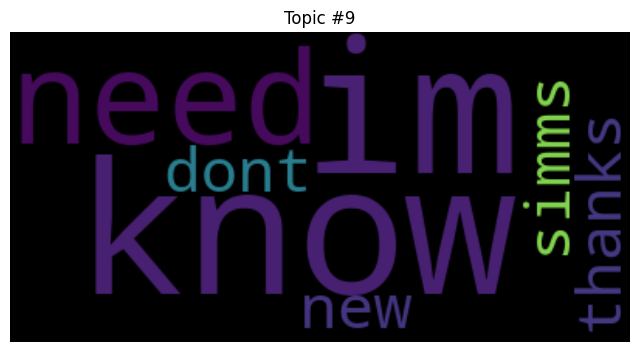

In [18]:
import matplotlib.pyplot as plt

for i, wordcloud in enumerate(wordclouds):
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic #{i}')
    plt.axis("off")
plt.show()

## Summary:

* The top 10 most important words were successfully extracted for each topic from the LDA model.
* Word clouds were generated for each topic using these extracted top words.
* The generated word clouds, one for each topic, were successfully displayed.


